#**Produisez une étude de marché avec R ou Python**

Vous travaillez chez La poule qui chante, une entreprise française d’agroalimentaire. Son activité principale est l’élevage et la vente de poulets sous le label “Poulet Agriculture Biologique”.

Son activité actuelle est franco-française mais Patrick, le PDG de l’entreprise souhaite évaluer la possibilité de se développer à l'international. Pour l'instant, le champ des possibles est bien large : aucun pays particulier ni aucun continent n'est pour le moment choisi. Tous les pays sont envisageables !

Ton objectif sera de proposer une analyse des groupements de pays que l’on peut cibler pour exporter nos poulets. Nous approfondirons ensuite l'étude de marché.

Tu seras en autonomie sur ce projet, notamment sur le choix des données à analyser et du langage (R ou Python).
1.	Pars des données de la FAO (Food and Agriculture Organization) en pièce jointe pour commencer ton analyse puis :
utilise l’analyse PESTEL pour trouver des idées de nouvelles données à ajouter (nous voulons au minimum 8 variables) ;
récupère et utilise toutes les données en open data que tu souhaites sur le site de la FAO, de la banque mondiale ou encore sur données mondiales.
2.	Prépare et nettoie les données :
Si tu utilises plusieurs sources de données, regroupe-les dans un même fichier.
L’idéal serait d’avoir au minimum 100 pays dans notre analyse (qui couvrent au moins 60% de la population mondiale).
3.	Passe ensuite à l’exploration des données (en Python ou en R).
Je ne vais pas t’apprendre ton travail, je crois que tu as suffisamment fait cela !

Pour la partie analytique, réalise une ACP avec réductions des dimensions et un clustering (dans un notebook séparé de l’exploration des données) :
Analyse le cercle des corrélations et la projection des individus.
Regroupe les pays en utilisant les données de ton ACP ou les données brutes.
Commence par la classification ascendante hiérarchique puis un k-means.


Juste pour te rappeler que tu présenteras tes résultats dans un mois devant le COMEX. Nous attendons des préconisations de pays où nous étendre, et puis tu feras un point sur ta méthodologie de collecte, les traitements et les analyses. Mais pas trop technique n’est-ce-pas ? La plupart des directeurs n’ont pas ton niveau en data !


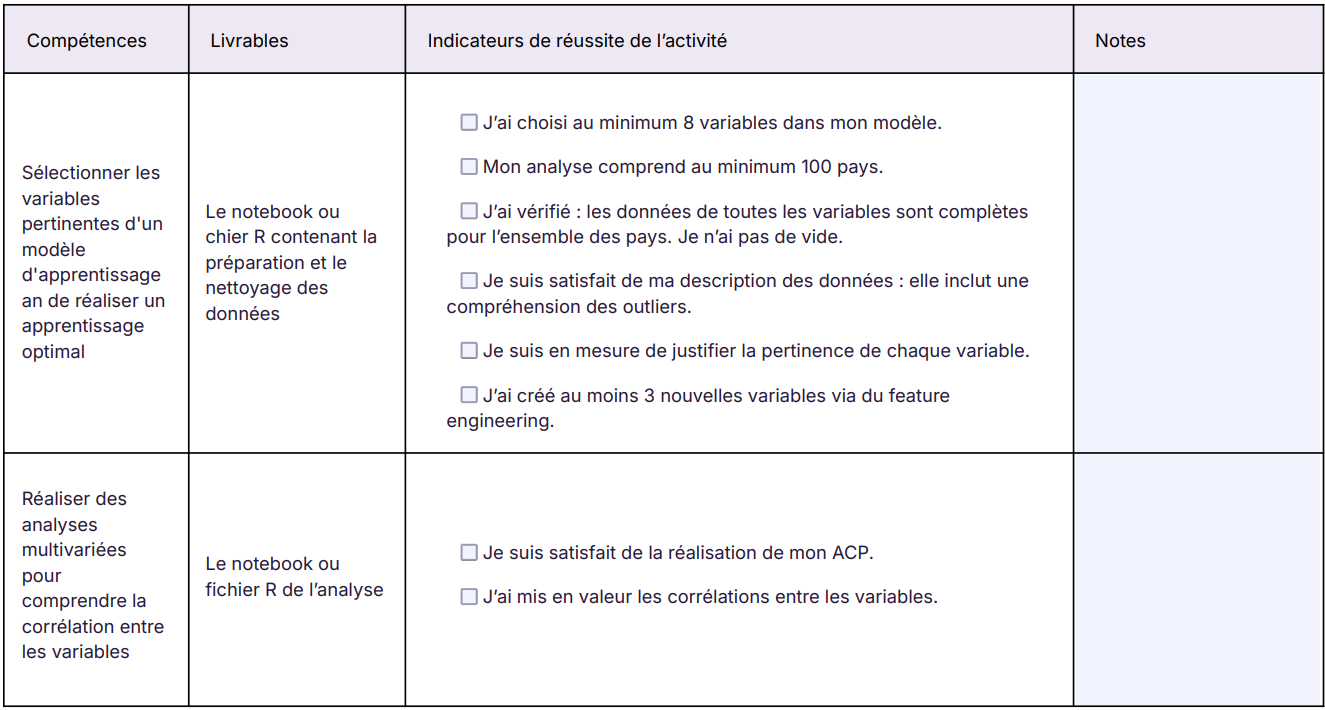

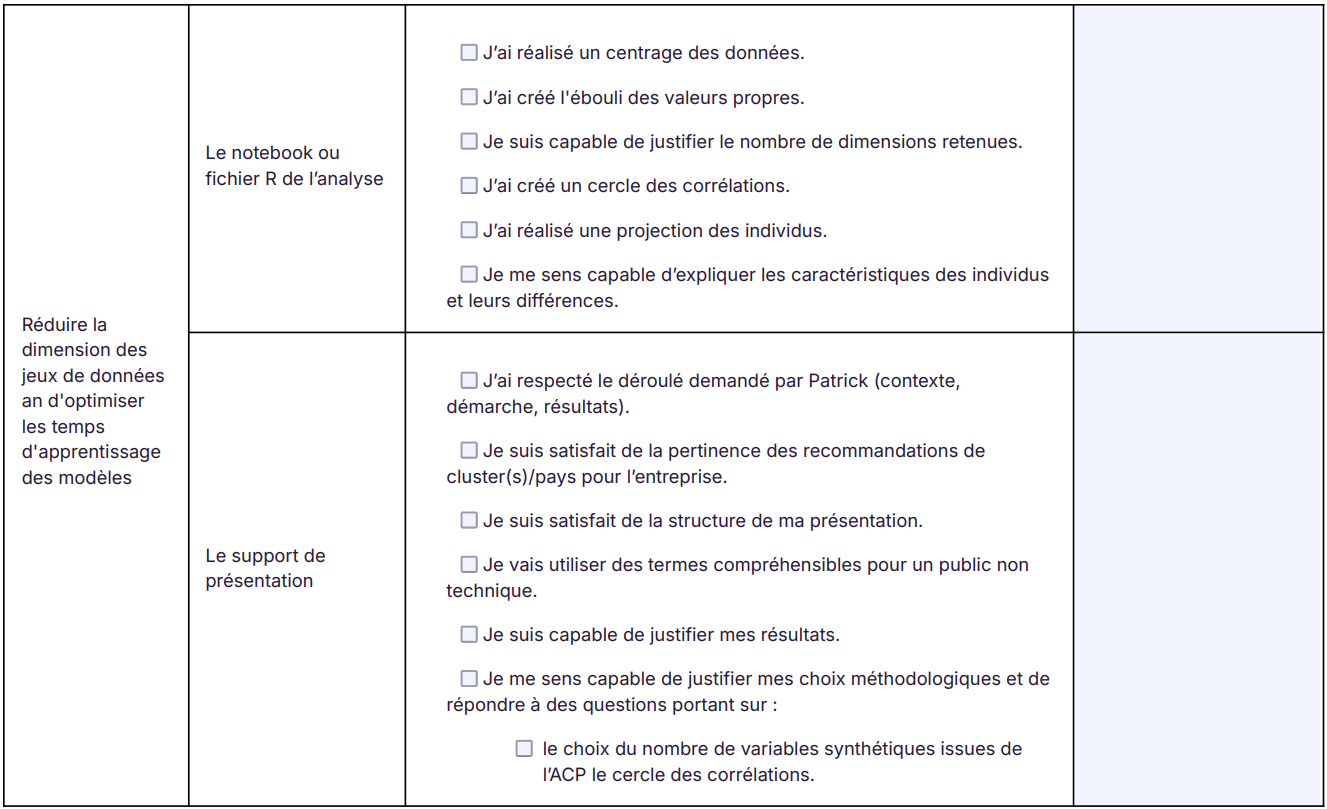

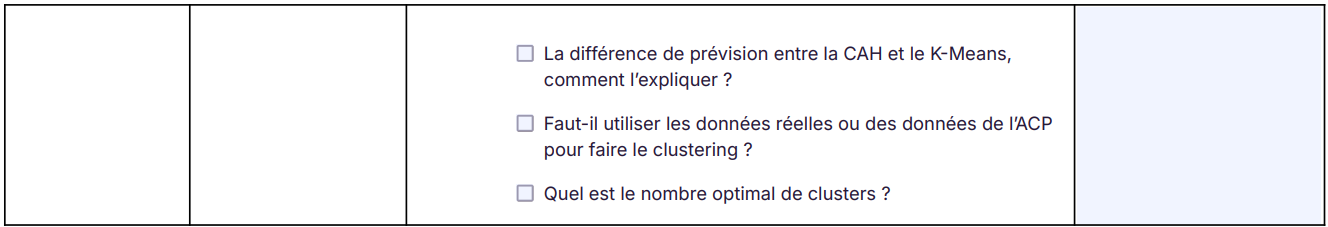

#**Sommaire**


#Phase 1 - Exploration et fusion des données


*   Étape 1 - Importation des librairies et chargement des fichiers
*   Étape 2 - Nettoyage et analyse exploratoire des fichiers
*   Étape 3 - Jonction des fichiers
*   Étape 4 - Préparation du dataframe pour analyses


#Phase 2 - Analyses des données

#Phase 1

##**Etape 1** - Importation des librairies et chargement des fichiers

###**1.1** - Importation des librairies

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from functools import reduce

In [ ]:
# Instruction permettant d'afficher toutes les colonnes d'un dataframe
pd.set_option('display.max_columns', None)

###**1.2** - Chargements des fichiers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importation du fichier population_2000_2018.csv
df_population = pd.read_csv("/content/drive/MyDrive/OpenClassrooms/Projet 11/Population_2000_2018.csv", sep=",")

# Importation du fichier DisponibiliteAlimentaire_2017.csv
df_disponibilite = pd.read_csv("/content/drive/MyDrive/OpenClassrooms/Projet 11/DisponibiliteAlimentaire_2017.csv", sep=",")

# Importation du fichier DoingBusiness_2017.csv
df_doingbusiness = pd.read_csv("/content/drive/MyDrive/OpenClassrooms/Projet 11/DoingBusiness_2017.csv", sep=";")

# Importation du fichier PIB_habitant_2017.csv
df_pib = pd.read_csv("/content/drive/MyDrive/OpenClassrooms/Projet 11/PIB_2017.csv", sep=",")

# Importation du fichier PoliticalStability_2017.csv
df_politicalstability = pd.read_csv("/content/drive/MyDrive/OpenClassrooms/Projet 11/PoliticalStability_2017.csv", sep=";")

# Importation du fichier RuleOfLaw_2017.csv
df_ruleoflaw = pd.read_csv("/content/drive/MyDrive/OpenClassrooms/Projet 11/RuleOfLaw_2017.csv", sep=";")

# Importation du fichier iso_pays.csv
df_isopays = pd.read_csv("/content/drive/MyDrive/OpenClassrooms/Projet 11/iso_pays.csv", sep=";")

##**Étape 2** - Nettoyage et analyse exploratoire des fichiers

###**2.1** - Populations

In [ ]:
df_population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


Le projet concernant l'année 2017 je vais en premier lieu filtrer le dataframe pour exclure toutes les autres années.

In [ ]:
df_population = df_population.query("Année == 2017")
df_population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
17,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,36296.113,X,Sources internationales sûres,NaN
36,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,57009.756,X,Sources internationales sûres,NaN
55,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,2884.169,X,Sources internationales sûres,NaN
74,OA,Séries temporelles annuelles,4,Algérie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,41389.189,X,Sources internationales sûres,NaN
93,OA,Séries temporelles annuelles,79,Allemagne,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,82658.409,X,Sources internationales sûres,NaN


In [ ]:
df_population.shape

(236, 15)

In [ ]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 17 to 4409
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            236 non-null    object 
 1   Domaine                 236 non-null    object 
 2   Code zone               236 non-null    int64  
 3   Zone                    236 non-null    object 
 4   Code Élément            236 non-null    int64  
 5   Élément                 236 non-null    object 
 6   Code Produit            236 non-null    int64  
 7   Produit                 236 non-null    object 
 8   Code année              236 non-null    int64  
 9   Année                   236 non-null    int64  
 10  Unité                   236 non-null    object 
 11  Valeur                  236 non-null    float64
 12  Symbole                 236 non-null    object 
 13  Description du Symbole  236 non-null    object 
 14  Note                    1 non-null      objec

In [ ]:
df_population.duplicated().sum()

0

In [ ]:
df_population.nunique()

,0
Code Domaine,1
Domaine,1
Code zone,236
Zone,236
Code Élément,1
Élément,1
Code Produit,1
Produit,1
Code année,1
Année,1


In [ ]:
df_population.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,236.000000,236.0,236.0,236.0,236.0,2.360000e+02
mean,134.894068,511.0,3010.0,2017.0,2017.0,3.198362e+04
std,78.046150,0.0,0.0,0.0,0.0,1.318949e+05
min,1.000000,511.0,3010.0,2017.0,2017.0,7.930000e-01
25%,68.750000,511.0,3010.0,2017.0,2017.0,3.803032e+02
50%,133.500000,511.0,3010.0,2017.0,2017.0,5.203511e+03
75%,198.250000,511.0,3010.0,2017.0,2017.0,1.930842e+04
max,299.000000,511.0,3010.0,2017.0,2017.0,1.421022e+06


In [ ]:
cols = ['Code zone', 'Zone', 'Année', 'Valeur']
df_population = df_population[cols]
df_population.head()

,Code zone,Zone,Année,Valeur
17,2,Afghanistan,2017,36296.113
36,202,Afrique du Sud,2017,57009.756
55,3,Albanie,2017,2884.169
74,4,Algérie,2017,41389.189
93,79,Allemagne,2017,82658.409


In [ ]:
df_population['Valeur'] = df_population['Valeur']*1000
df_population['Valeur'] = df_population['Valeur'].astype(int)
df_population.head()

<ipython-input-113-32e7380525aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_population['Valeur'] = df_population['Valeur']*1000
<ipython-input-113-32e7380525aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_population['Valeur'] = df_population['Valeur'].astype(int)


,Code zone,Zone,Année,Valeur
17,2,Afghanistan,2017,36296113
36,202,Afrique du Sud,2017,57009756
55,3,Albanie,2017,2884169
74,4,Algérie,2017,41389189
93,79,Allemagne,2017,82658409


Réduction du dataframe pour ne garder que l'année 2017 et les colonnes qui nous intéressent.

###**2.2** - Disponiblité

In [ ]:
df_disponibilite.head(20)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.00,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.00,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.00,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.00,S,Données standardisées
5,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5521,Aliments pour animaux,2511,Blé et produits,2017,2017,Milliers de tonnes,76.00,S,Données standardisées
6,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5527,Semences,2511,Blé et produits,2017,2017,Milliers de tonnes,344.00,S,Données standardisées
7,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2511,Blé et produits,2017,2017,Milliers de tonnes,642.00,S,Données standardisées
8,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5170,Résidus,2511,Blé et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
9,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5142,Nourriture,2511,Blé et produits,2017,2017,Milliers de tonnes,5640.00,S,Données standardisées


In [ ]:
df_disponibilite.shape

(176600, 14)

In [ ]:
df_disponibilite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [ ]:
df_disponibilite.duplicated().sum()

0

In [ ]:
df_disponibilite.nunique()

,0
Code Domaine,1
Domaine,1
Code zone,174
Zone,174
Code Élément,17
Élément,17
Code Produit,98
Produit,98
Code année,1
Année,1


In [ ]:
df_disponibilite.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,176600.000000,176600.000000,176600.000000,176600.0,176600.0,176600.000000
mean,125.474740,3810.052894,2628.778545,2017.0,2017.0,210.554918
std,72.941699,2211.790089,91.993247,0.0,0.0,4762.047787
min,1.000000,645.000000,2511.000000,2017.0,2017.0,-10388.000000
25%,63.000000,684.000000,2556.000000,2017.0,2017.0,0.000000
50%,120.000000,5142.000000,2612.000000,2017.0,2017.0,0.120000
75%,188.000000,5301.000000,2732.000000,2017.0,2017.0,8.462500
max,276.000000,5911.000000,2899.000000,2017.0,2017.0,758548.000000


In [ ]:
cols = ['Code zone', 'Zone', 'Élément', 'Produit', 'Unité', 'Valeur']
df_disponibilite = df_disponibilite[cols]
df_disponibilite.head()

,Code zone,Zone,Élément,Produit,Unité,Valeur
0,2,Afghanistan,Production,Blé et produits,Milliers de tonnes,4281.0
1,2,Afghanistan,Importations - Quantité,Blé et produits,Milliers de tonnes,2302.0
2,2,Afghanistan,Variation de stock,Blé et produits,Milliers de tonnes,-119.0
3,2,Afghanistan,Exportations - Quantité,Blé et produits,Milliers de tonnes,0.0
4,2,Afghanistan,Disponibilité intérieure,Blé et produits,Milliers de tonnes,6701.0


In [ ]:
df_disponibilite['Produit'].unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

In [ ]:
df_disponibilite = df_disponibilite.query("Produit == 'Viande de Volailles'")

In [ ]:
df_disponibilite.head()

,Code zone,Zone,Élément,Produit,Unité,Valeur
651,2,Afghanistan,Production,Viande de Volailles,Milliers de tonnes,28.0
652,2,Afghanistan,Importations - Quantité,Viande de Volailles,Milliers de tonnes,29.0
653,2,Afghanistan,Variation de stock,Viande de Volailles,Milliers de tonnes,0.0
654,2,Afghanistan,Disponibilité intérieure,Viande de Volailles,Milliers de tonnes,57.0
655,2,Afghanistan,Pertes,Viande de Volailles,Milliers de tonnes,2.0


In [ ]:
df_dispo_volaille = df_disponibilite.pivot(index = 'Zone', columns = 'Élément', values = 'Valeur')
df_dispo_volaille.reset_index(inplace=True)
df_dispo_volaille.head()

Élément,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
1,Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,-0.0
2,Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0
3,Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0
4,Allemagne,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0


In [ ]:
cols = ['Zone', 'Production', 'Importations - Quantité', 'Exportations - Quantité', 'Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité de protéines en quantité (g/personne/jour)']
df_dispo_volaille = df_dispo_volaille[cols]
df_dispo_volaille.head()

Élément,Zone,Production,Importations - Quantité,Exportations - Quantité,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour)
0,Afghanistan,28.0,29.0,NaN,1.53,0.54
1,Afrique du Sud,1667.0,514.0,63.0,35.69,14.11
2,Albanie,13.0,38.0,0.0,16.36,6.26
3,Algérie,275.0,2.0,0.0,6.38,1.97
4,Allemagne,1514.0,842.0,646.0,19.47,7.96


In [ ]:
df_dispo_volaille.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 6 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Zone                                                      172 non-null    object 
 1   Production                                                168 non-null    float64
 2   Importations - Quantité                                   170 non-null    float64
 3   Exportations - Quantité                                   135 non-null    float64
 4   Disponibilité alimentaire en quantité (kg/personne/an)    172 non-null    float64
 5   Disponibilité de protéines en quantité (g/personne/jour)  172 non-null    float64
dtypes: float64(5), object(1)
memory usage: 8.2+ KB


Le dataframe maintenant préparé permet de voir différents critères (en quantité) concernant la volaille pour 172 pays.

###**2.3** - Doing Business

In [ ]:
df_doingbusiness.head()

,Country code,Economy,Region,Income group,DB year,Ease of doing business score (DB17-21 methodology)
0,AFG,Afghanistan,South Asia,Low income,2017,"39,2"
1,ALB,Albania,Europe & Central Asia,Upper middle income,2017,64
2,DZA,Algeria,Middle East & North Africa,Lower-middle income,2017,"45,8"
3,AGO,Angola,Sub-Saharan Africa,Lower middle income,2017,"37,2"
4,ATG,Antigua and Barbuda,Latin America & Caribbean,High income,2017,"58,4"


In [ ]:
df_doingbusiness.shape

(212, 6)

In [ ]:
df_doingbusiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 6 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Country code                                        212 non-null    object
 1   Economy                                             212 non-null    object
 2   Region                                              212 non-null    object
 3   Income group                                        212 non-null    object
 4   DB year                                             212 non-null    int64 
 5   Ease of doing business score (DB17-21 methodology)  212 non-null    object
dtypes: int64(1), object(5)
memory usage: 10.1+ KB


In [ ]:
df_doingbusiness['Ease of doing business score (DB17-21 methodology)'] = df_doingbusiness['Ease of doing business score (DB17-21 methodology)'].str.replace(",", ".")
df_doingbusiness['Ease of doing business score (DB17-21 methodology)'] = pd.to_numeric(df_doingbusiness['Ease of doing business score (DB17-21 methodology)'], errors ='coerce')

In [ ]:
df_doingbusiness.duplicated().sum()

0

In [ ]:
df_doingbusiness.nunique()

,0
Country code,212
Economy,212
Region,7
Income group,6
DB year,1
Ease of doing business score (DB17-21 methodology),174


In [ ]:
df_doingbusiness.describe()

,DB year,Ease of doing business score (DB17-21 methodology)
count,212.0,212.000000
mean,2017.0,60.720283
std,0.0,13.877692
min,2017.0,20.200000
25%,2017.0,51.850000
50%,2017.0,60.700000
75%,2017.0,72.150000
max,2017.0,86.800000


In [ ]:
cols = ['Country code', 'Economy', 'Ease of doing business score (DB17-21 methodology)']
df_doingbusiness = df_doingbusiness[cols]
df_doingbusiness = df_doingbusiness.rename(columns={"Economy": "Country", "Country code": "Country_code", "Ease of doing business score (DB17-21 methodology)": "DB_score"})
df_doingbusiness.head()

,Country_code,Country,DB_score
0,AFG,Afghanistan,39.2
1,ALB,Albania,64.0
2,DZA,Algeria,45.8
3,AGO,Angola,37.2
4,ATG,Antigua and Barbuda,58.4


Dataframe de 212 pays avec le nom du pays en anglais, son code ISO ainsi que son score de Doing Business (indice mesurant la facilité à faire des affaires avec le pays) allant de 20 à 86.

###**2.4** - PIB (habitant)

In [ ]:
df_pib.head()

,Country Name,Country Code,Series Name,Series Code,2017 [YR2017]
0,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,525.469770891619
1,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,4531.03220675893
2,Algeria,DZA,GDP per capita (current US$),NY.GDP.PCAP.CD,4554.66753957828
3,American Samoa,ASM,GDP per capita (current US$),NY.GDP.PCAP.CD,11863.6839452565
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,40672.9943348258


In [ ]:
df_pib.shape

(218, 5)

In [ ]:
df_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   218 non-null    object
 1   Country Code   218 non-null    object
 2   Series Name    218 non-null    object
 3   Series Code    218 non-null    object
 4   2017 [YR2017]  218 non-null    object
dtypes: object(5)
memory usage: 8.6+ KB


In [ ]:
df_pib.duplicated().sum()

0

In [ ]:
df_pib.nunique()

,0
Country Name,218
Country Code,218
Series Name,1
Series Code,1
2017 [YR2017],212


In [ ]:
df_pib.isna().mean()

,0
Country Name,0.0
Country Code,0.0
Series Name,0.0
Series Code,0.0
2017 [YR2017],0.0


In [ ]:
cols = ['Country Name', 'Country Code', '2017 [YR2017]']
df_pib = df_pib[cols]
df_pib = df_pib.rename(columns = {"Country Name": "Country", "Country Code": "Country_code", "2017 [YR2017]": "PIB_hab"})
df_pib['PIB_hab'] = df_pib['PIB_hab'].round(2)
df_pib.head()

,Country,Country_code,PIB_hab
0,Afghanistan,AFG,525.469770891619
1,Albania,ALB,4531.03220675893
2,Algeria,DZA,4554.66753957828
3,American Samoa,ASM,11863.6839452565
4,Andorra,AND,40672.9943348258


In [ ]:
df_pib.describe()

,Country,Country_code,PIB_hab
count,218,218,218
unique,218,218,212
top,Afghanistan,AFG,..
freq,1,1,7


Dataframe de 218 pays avec le nom du pays en anglais, son code ISO ainsi que le PIB par habitant en $ US.

###**2.5** - Political Stability

In [ ]:
df_politicalstability.head()

,Country Name,Country Code,Series Name,Series Code,2017 [YR2017]
0,Afghanistan,AFG,Political Stability and Absence of Violence/Te...,PV.EST,-2.794976
1,Albania,ALB,Political Stability and Absence of Violence/Te...,PV.EST,0.373771
2,Algeria,DZA,Political Stability and Absence of Violence/Te...,PV.EST,-0.919614
3,American Samoa,ASM,Political Stability and Absence of Violence/Te...,PV.EST,1.184324
4,Andorra,AND,Political Stability and Absence of Violence/Te...,PV.EST,1.392890


In [ ]:
df_politicalstability.shape

(214, 5)

In [ ]:
df_politicalstability.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   214 non-null    object 
 1   Country Code   214 non-null    object 
 2   Series Name    214 non-null    object 
 3   Series Code    214 non-null    object 
 4   2017 [YR2017]  214 non-null    float64
dtypes: float64(1), object(4)
memory usage: 8.5+ KB


In [ ]:
df_politicalstability.duplicated().sum()

0

In [ ]:
df_politicalstability.nunique()

,0
Country Name,214
Country Code,214
Series Name,1
Series Code,1
2017 [YR2017],209


In [ ]:
df_politicalstability.isna().mean()

,0
Country Name,0.0
Country Code,0.0
Series Name,0.0
Series Code,0.0
2017 [YR2017],0.0


In [ ]:
cols = ['Country Name', 'Country Code', '2017 [YR2017]']
df_politicalstability = df_politicalstability[cols]
df_politicalstability = df_politicalstability.rename(columns = {"Country Name": "Country", "Country Code": "Country_code", "2017 [YR2017]": "PS_score"})
df_politicalstability['PS_score'] = df_politicalstability['PS_score'].astype(float).round(2)
df_politicalstability.head()

,Country,Country_code,PS_score
0,Afghanistan,AFG,-2.79
1,Albania,ALB,0.37
2,Algeria,DZA,-0.92
3,American Samoa,ASM,1.18
4,Andorra,AND,1.39


In [ ]:
df_politicalstability.describe()

,PS_score
count,214.000000
mean,0.011402
std,0.999325
min,-2.930000
25%,-0.617500
50%,0.080000
75%,0.857500
max,1.930000


Dataframe de 214 pays avec le nom du pays en anglais, son code ISO ainsi que son score de Political Stability (indice mesurant la stabilité politique au sein du pays) allant de -2.93 à 1.93.

###**2.6** - Rule Of Law

In [ ]:
df_ruleoflaw.head()

,Country Name,Country Code,Series Name,Series Code,2017 [YR2017]
0,Afghanistan,AFG,Rule of Law: Estimate,RL.EST,-1.581176
1,Albania,ALB,Rule of Law: Estimate,RL.EST,-0.414192
2,Algeria,DZA,Rule of Law: Estimate,RL.EST,-0.925013
3,American Samoa,ASM,Rule of Law: Estimate,RL.EST,1.295301
4,Andorra,AND,Rule of Law: Estimate,RL.EST,1.535569


In [ ]:
df_ruleoflaw.shape

(214, 5)

In [ ]:
df_ruleoflaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   214 non-null    object 
 1   Country Code   214 non-null    object 
 2   Series Name    214 non-null    object 
 3   Series Code    214 non-null    object 
 4   2017 [YR2017]  214 non-null    float64
dtypes: float64(1), object(4)
memory usage: 8.5+ KB


In [ ]:
df_ruleoflaw.duplicated().sum()

0

In [ ]:
df_ruleoflaw.nunique()

,0
Country Name,214
Country Code,214
Series Name,1
Series Code,1
2017 [YR2017],206


In [ ]:
df_ruleoflaw.isna().mean()

,0
Country Name,0.0
Country Code,0.0
Series Name,0.0
Series Code,0.0
2017 [YR2017],0.0


In [ ]:
cols = ['Country Name', 'Country Code', '2017 [YR2017]']
df_ruleoflaw = df_ruleoflaw[cols]
df_ruleoflaw = df_ruleoflaw.rename(columns = {"Country Name": "Country", "Country Code": "Country_code", "2017 [YR2017]": "ROL_score"})
df_ruleoflaw['ROL_score'] = df_ruleoflaw['ROL_score'].astype(float).round(2)
df_ruleoflaw.head()

,Country,Country_code,ROL_score
0,Afghanistan,AFG,-1.58
1,Albania,ALB,-0.41
2,Algeria,DZA,-0.93
3,American Samoa,ASM,1.30
4,Andorra,AND,1.54


In [ ]:
df_ruleoflaw.describe()

,ROL_score
count,214.000000
mean,-0.007804
std,0.995079
min,-2.330000
25%,-0.720000
50%,-0.155000
75%,0.665000
max,2.020000


Dataframe de 214 pays avec le nom du pays en anglais, son code ISO ainsi que son score de Rule Of Law (indice mesurant la confiance dans le respect des lois) allant de -2.33 à 2.02

###**2.7** - ISO Pays

In [ ]:
df_isopays.head()

,iso3,name_en,name_fr,name_native
0,AFG,Afghanistan,Afghanistan,افغانستان
1,ZAF,South Africa,Afrique du Sud,South Africa
2,ALB,Albania,Albanie,Shqipëria
3,DZA,Algeria,Algérie,الجزائر
4,DEU,Germany,Allemagne,Deutschland


In [ ]:
df_isopays.shape

(218, 4)

In [ ]:
df_isopays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   iso3         218 non-null    object
 1   name_en      218 non-null    object
 2   name_fr      218 non-null    object
 3   name_native  218 non-null    object
dtypes: object(4)
memory usage: 6.9+ KB


In [ ]:
df_isopays.duplicated().sum()

0

In [ ]:
df_isopays.nunique()

,0
iso3,218
name_en,218
name_fr,218
name_native,218


In [ ]:
df_isopays.isna().mean()

,0
iso3,0.0
name_en,0.0
name_fr,0.0
name_native,0.0


Dataframe de 218 pays avec le code ISO, le nom natif, français et anglais.

##**Étape 3** - Jonction des fichiers

###**3.1** - Dispo_volaille / Population ==> **Dispo_popu**

fusion de **dispo_volaille** et **population** en premier, ces dataframes provenant de la même source (FAO), leur structure est identique.

In [ ]:
df_dispo_popu = pd.merge(
    df_dispo_volaille,
    df_population,
    left_on='Zone',
    right_on='Zone',
    how='left'
)

df_dispo_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 9 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Zone                                                      172 non-null    object 
 1   Production                                                168 non-null    float64
 2   Importations - Quantité                                   170 non-null    float64
 3   Exportations - Quantité                                   135 non-null    float64
 4   Disponibilité alimentaire en quantité (kg/personne/an)    172 non-null    float64
 5   Disponibilité de protéines en quantité (g/personne/jour)  172 non-null    float64
 6   Code zone                                                 172 non-null    int64  
 7   Année                                                     172 non-null    int64  
 8   Valeur               

In [ ]:
colonnes_a_supprimer = ['Code zone', 'Année']
df_dispo_popu = df_dispo_popu.drop(columns = colonnes_a_supprimer)
df_dispo_popu = df_dispo_popu.rename(columns ={'Valeur': 'Population'})
df_dispo_popu.head()

,Zone,Production,Importations - Quantité,Exportations - Quantité,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Population
0,Afghanistan,28.0,29.0,NaN,1.53,0.54,36296113
1,Afrique du Sud,1667.0,514.0,63.0,35.69,14.11,57009756
2,Albanie,13.0,38.0,0.0,16.36,6.26,2884169
3,Algérie,275.0,2.0,0.0,6.38,1.97,41389189
4,Allemagne,1514.0,842.0,646.0,19.47,7.96,82658409


###**3.2** - Dispo_popu / Isopays ==> **Dispo_popu_iso**

Nous fusionnons ensuite avec **iso_pays** pour récupérer le code ISO et établir une clé avec les dataframes restants.

In [ ]:
# Zones sans correspondance
zones_no_match = df_dispo_popu[~df_dispo_popu['Zone'].isin(df_isopays['name_fr'])]
print(f"Nombre de zones sans correspondance : {len(zones_no_match)}")
print("Zones sans correspondance :")
print(zones_no_match[['Zone']].drop_duplicates())

Nombre de zones sans correspondance : 29
Zones sans correspondance :
                                                  Zone
7                                      Arabie saoudite
18                     Bolivie (État plurinational de)
24                                             Bélarus
26                                          Cabo Verde
31                            Chine - RAS de Hong-Kong
32                                Chine - RAS de Macao
33                           Chine, Taiwan Province de
34                                 Chine, continentale
41                                       Côte d'Ivoire
45                                         El Salvador
52                                Fédération de Russie
68                      Iran (République islamique d')
69                                                Iraq
85                                             Libéria
96                                             Maurice
102                                            Myan

Nous corrigons le nom de certains pays pour avoir une totale correspondance entre les dataframes.

In [ ]:
correction_pays = {"Arabie saoudite": "Arabie Saoudite",
                   "Bolivie (État plurinational de)": "Bolivie",
                   "Bélarus" : "Biélorussie",
                   "Cabo Verde": "Cap Vert",
                   "Chine - RAS de Hong-Kong": "Hong Kong (Chine)",
                   "Chine - RAS de Macao": "Macao (Chine)",
                   "Chine, Taiwan Province de": "Taïwan",
                   "Chine, continentale": "Chine",
                   "Côte d'Ivoire": "Côte dIvoire",
                   "El Salvador": "Salvador",
                   "Fédération de Russie": "Russie",
                   "Iran (République islamique d')": "Iran",
                   "Iraq": "Irak",
                   "Libéria": "Liberia",
                   "Maurice": "Ile Maurice",
                   "Myanmar": "Birmanie",
                   "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord": "Royaume-Uni",
                   "République de Corée": "Corée du Sud",
                   "République de Moldova": "Moldavie",
                   "République démocratique populaire lao": "Laos",
                   "République populaire démocratique de Corée": "Corée du Nord",
                   "République-Unie de Tanzanie": "Tanzanie",
                   "Saint-Kitts-et-Nevis": "Saint-Christophe-et-Niévès",
                   "Tchéquie": "République tchèque",
                   "Timor-Leste": "Timor oriental",
                   "Trinité-et-Tobago":"Trinité et Tobago",
                   "Venezuela (République bolivarienne du)": "Venezuela",
                   "Viet Nam": "Viêt Nam",
                   "États-Unis d'Amérique": "États-Unis"}

In [ ]:
# Appliquer les corrections manuelles
df_dispo_popu['Zone'] = df_dispo_popu['Zone'].replace(correction_pays)

In [ ]:
# Zones sans correspondance
zones_no_match = df_dispo_popu[~df_dispo_popu['Zone'].isin(df_isopays['name_fr'])]
print(f"Nombre de zones sans correspondance : {len(zones_no_match)}")
print("Zones sans correspondance :")
print(zones_no_match[['Zone']].drop_duplicates())

Nombre de zones sans correspondance : 0
Zones sans correspondance :
Empty DataFrame
Columns: [Zone]
Index: []


In [ ]:
df_dispo_popu_iso = pd.merge(
    df_dispo_popu,
    df_isopays,
    left_on='Zone',
    right_on='name_fr',
    how='left',
)

df_dispo_popu_iso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 11 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Zone                                                      172 non-null    object 
 1   Production                                                168 non-null    float64
 2   Importations - Quantité                                   170 non-null    float64
 3   Exportations - Quantité                                   135 non-null    float64
 4   Disponibilité alimentaire en quantité (kg/personne/an)    172 non-null    float64
 5   Disponibilité de protéines en quantité (g/personne/jour)  172 non-null    float64
 6   Population                                                172 non-null    int64  
 7   iso3                                                      172 non-null    object 
 8   name_en             

###**3.3** - Dispo_popu_iso / Politicalstability / Ruleoflaw / Doingbusiness / PIB ==> **Final**

Fusion des dataframes restants en une fois grâce au code ISO.

In [ ]:
# Renommer la colonne iso3 en Country_code pour uniformiser la clé
df_dispo_popu_iso = df_dispo_popu_iso.rename(columns={"iso3": "Country_code"})

# Liste des DataFrames à fusionner
dfs = [df_dispo_popu_iso, df_politicalstability, df_ruleoflaw, df_doingbusiness, df_pib]

# Fusion avec gestion des suffixes
df_final = reduce(lambda left, right: left.merge(right, on="Country_code", how="left", suffixes=("", "_dup")), dfs)

df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 19 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Zone                                                      172 non-null    object 
 1   Production                                                168 non-null    float64
 2   Importations - Quantité                                   170 non-null    float64
 3   Exportations - Quantité                                   135 non-null    float64
 4   Disponibilité alimentaire en quantité (kg/personne/an)    172 non-null    float64
 5   Disponibilité de protéines en quantité (g/personne/jour)  172 non-null    float64
 6   Population                                                172 non-null    int64  
 7   Country_code                                              172 non-null    object 
 8   name_en             

In [ ]:
colonnes_a_supprimer = ['name_en', 'name_fr', 'name_native', 'Country_code', 'Country', 'Country_dup']
df_final = df_final.drop(columns = colonnes_a_supprimer)
df_final.head()

,Zone,Production,Importations - Quantité,Exportations - Quantité,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Population,PS_score,ROL_score,DB_score,PIB_hab
0,Afghanistan,28.0,29.0,NaN,1.53,0.54,36296113,-2.79,-1.58,39.2,525.469770891619
1,Afrique du Sud,1667.0,514.0,63.0,35.69,14.11,57009756,-0.28,-0.16,64.9,6618.33508255701
2,Albanie,13.0,38.0,0.0,16.36,6.26,2884169,0.37,-0.41,64.0,4531.03220675893
3,Algérie,275.0,2.0,0.0,6.38,1.97,41389189,-0.92,-0.93,45.8,4554.66753957828
4,Allemagne,1514.0,842.0,646.0,19.47,7.96,82658409,0.57,1.57,79.4,45526.5999576533


##**Étape 4** - Préparation du dataframe pour analyses

###**4.1** - Gestion des valeurs manquantes

<Axes: >

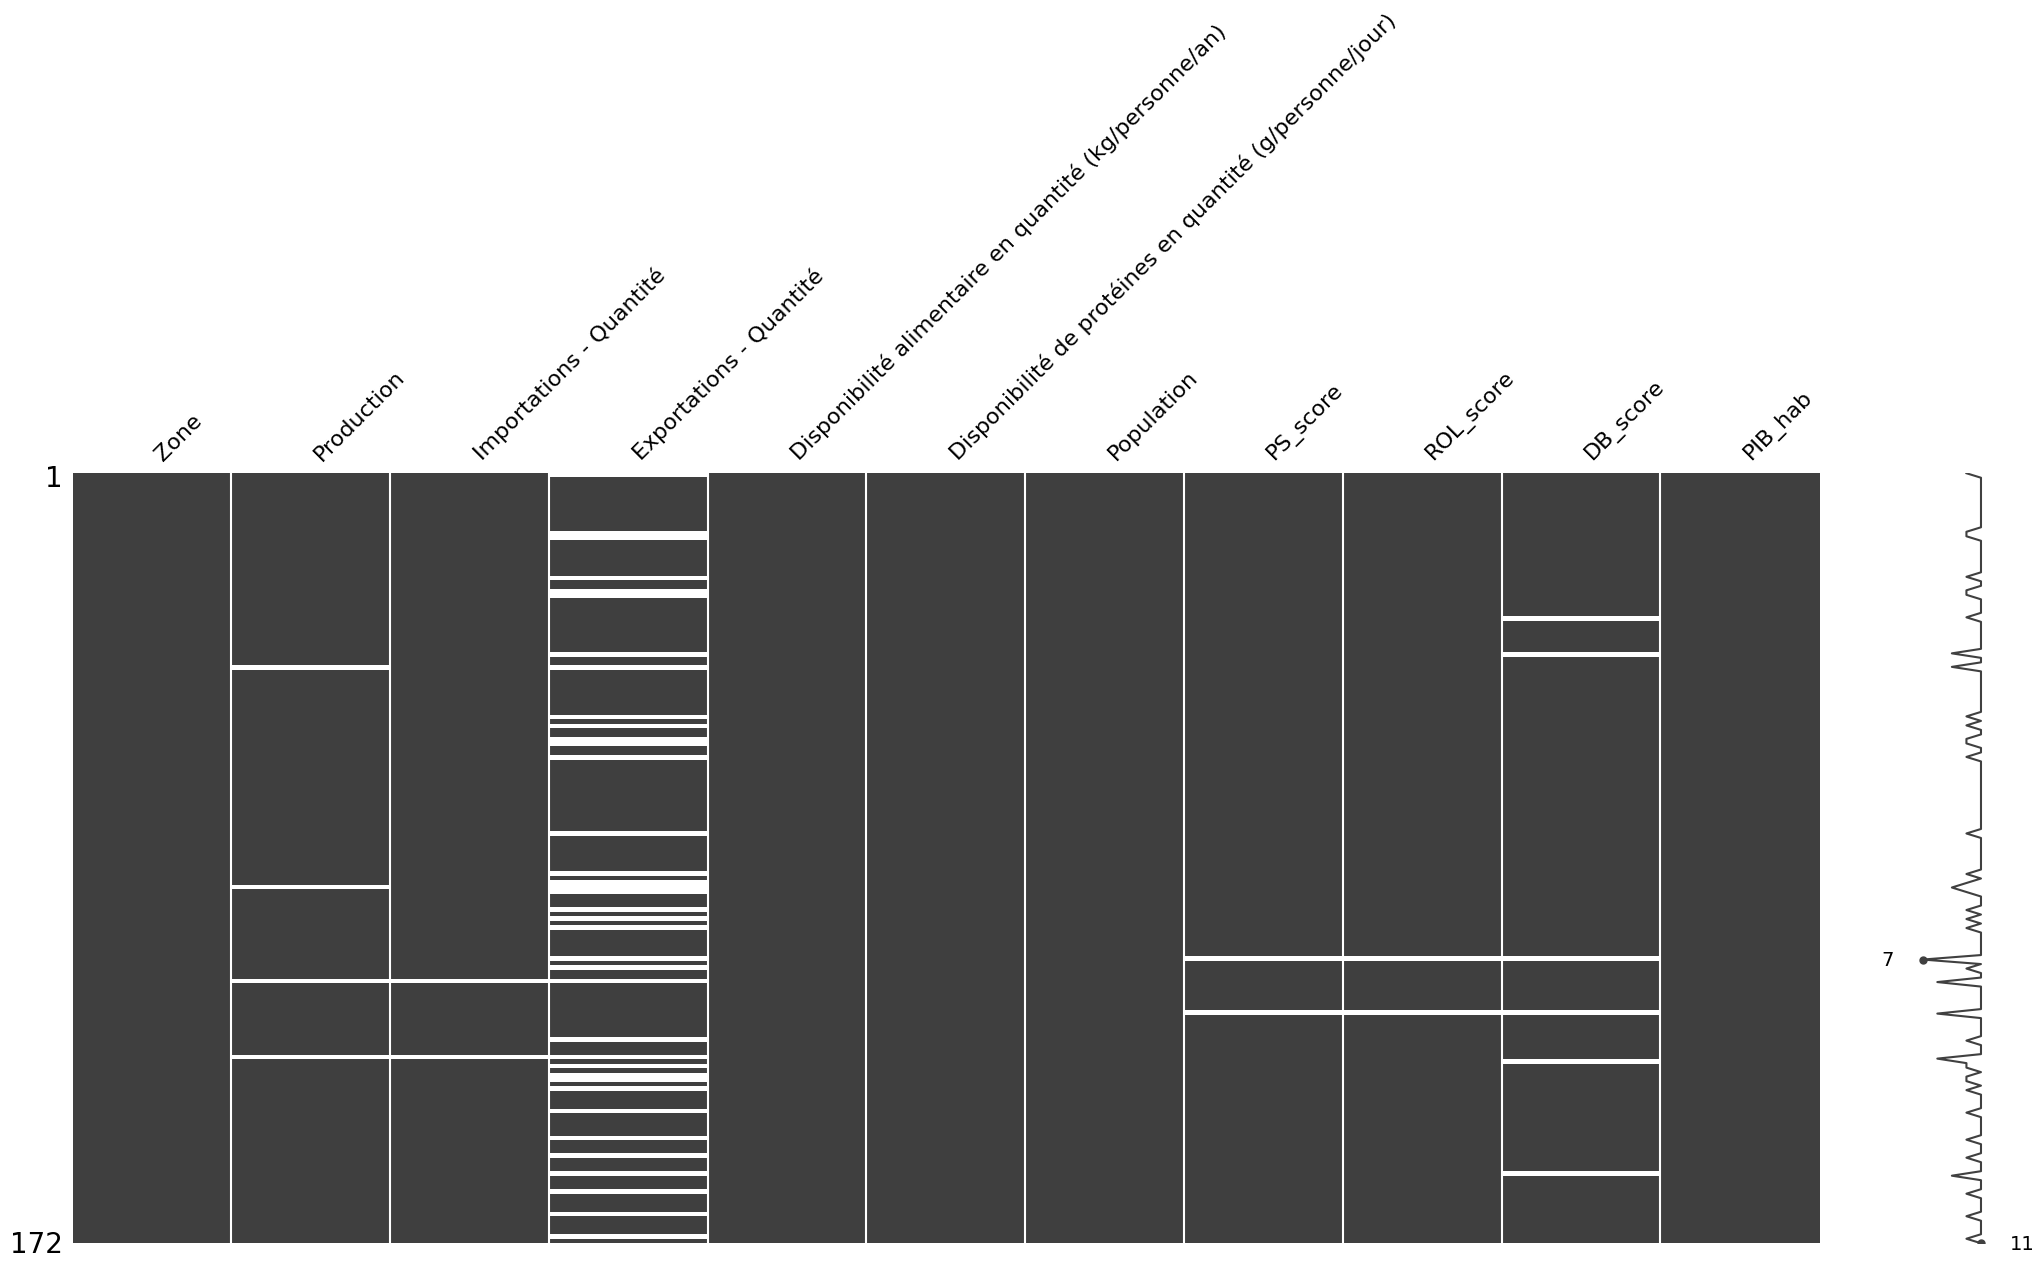

In [ ]:
msno.matrix(df_final)

Les valeurs manquantes concernant la volaille peuvent être remplacé par 0, nous traiterons les autres valeurs manquantes spécifiquement au cas par cas.

In [ ]:
# Remplacement des NaN par 0
df_final[["Production", "Importations - Quantité", "Exportations - Quantité"]] = df_final[["Production", "Importations - Quantité", "Exportations - Quantité"]].fillna(0)

In [ ]:
df_final.query("PS_score.isna()")

,Zone,Production,Importations - Quantité,Exportations - Quantité,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Population,PS_score,ROL_score,DB_score,PIB_hab
108,Nouvelle-Calédonie,1.0,9.0,0.0,38.71,14.05,277150,NaN,NaN,NaN,32354.7102832901
120,Polynésie française,1.0,15.0,0.0,47.40,16.20,276102,NaN,NaN,NaN,20826.9312492172


Ces deux iles étant françaises je choisi de remplacer les NaN par les valeurs de la France.

In [ ]:
# Récupérer les valeurs de la France
france_values = df_final.loc[df_final["Zone"] == "France"].squeeze()

# Remplacer les NaN pour Nouvelle-Calédonie et Polynésie française
df_final.loc[df_final["Zone"].isin(["Nouvelle-Calédonie", "Polynésie française"])] = df_final.loc[df_final["Zone"].isin(["Nouvelle-Calédonie", "Polynésie française"])].fillna(france_values)

In [ ]:
df_final.query("DB_score.isna()")

,Zone,Production,Importations - Quantité,Exportations - Quantité,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Population,PS_score,ROL_score,DB_score,PIB_hab
32,Macao (Chine),3.0,23.0,0.0,34.47,11.90,622585,1.41,0.81,NaN,77704.9215312666
40,Cuba,29.0,312.0,0.0,23.72,7.12,11339254,0.64,-0.45,NaN,8610.60829531998
131,Corée du Nord,43.0,0.0,0.0,1.62,0.49,25429825,-0.50,-1.72,NaN,..
156,Turkménistan,20.0,9.0,0.0,4.52,1.53,5757667,-0.13,-1.48,NaN,5828.4816623489


Macao étant une RAS de la Chine je choisi de remplacer les NaN par les valeurs de la Chine.

In [ ]:
# Récupérer les valeurs de la Chine
china_values = df_final.loc[df_final["Zone"] == "Chine"].squeeze()

# Remplacer les NaN pour Macao
df_final.loc[df_final["Zone"] == "Macao (Chine)", :] = df_final.loc[df_final["Zone"] == "Macao (Chine)"].fillna(china_values)


In [ ]:
# Supression de la Corée du Nord pour des raisons évidentes
df_final = df_final.query("Zone != 'Corée du Nord'")

In [ ]:
# Supression de Cuba pour manque de donnée sur DB_score
df_final = df_final.query("Zone != 'Cuba'")

In [ ]:
df_final.query("Zone == 'Afghanistan' or Zone == 'Iran' or Zone == 'Kazakhstan' or Zone == 'Turkménistan'")

,Zone,Production,Importations - Quantité,Exportations - Quantité,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Population,PS_score,ROL_score,DB_score,PIB_hab
0,Afghanistan,28.0,29.0,0.0,1.53,0.54,36296113,-2.79,-1.58,39.2,525.469770891619
68,Iran,2174.0,6.0,45.0,27.52,9.80,80673883,-0.93,-0.70,55.7,5753.11544659399
77,Kazakhstan,171.0,174.0,6.0,18.27,6.18,18080019,0.02,-0.49,74.3,8943.08416791984
156,Turkménistan,20.0,9.0,0.0,4.52,1.53,5757667,-0.13,-1.48,NaN,5828.4816623489


Remplacement du NaN de DB_score du Turkménistan par la moyenne des pays frontaliers.

In [ ]:
scores = [74.3, 55.7, 39.2]

# Calcul de la moyenne
turk_db_score = sum(scores) / len(scores)

# Remplacement du NaN dans la colonne DB_score pour le Turkménistan
df_final.loc[df_final["Zone"] == "Turkménistan", "DB_score"] = turk_db_score

In [ ]:
df_final.query("PIB_hab == '..'")

,Zone,Production,Importations - Quantité,Exportations - Quantité,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Population,PS_score,ROL_score,DB_score,PIB_hab
161,Venezuela,600.0,25.0,0.0,20.28,7.23,29402484,-1.25,-2.26,31.1,..


Le PIB du Vénézuela correspond à 12500€ selon Wikipédia, je choisi d'appliquer cette valeur pour l'analyse.

In [ ]:
df_final.loc[df_final["Zone"] == "Venezuela", "PIB_hab"] = 12500

###**4.2** - Feature engineering

Pour réduire et harmoniser les données, nous appliquerons diverses opérations sur les variables liées à l'alimentation.

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 0 to 171
Data columns (total 11 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Zone                                                      170 non-null    object 
 1   Production                                                170 non-null    float64
 2   Importations - Quantité                                   170 non-null    float64
 3   Exportations - Quantité                                   170 non-null    float64
 4   Disponibilité alimentaire en quantité (kg/personne/an)    170 non-null    float64
 5   Disponibilité de protéines en quantité (g/personne/jour)  170 non-null    float64
 6   Population                                                170 non-null    int64  
 7   PS_score                                                  170 non-null    float64
 8   ROL_score                

In [ ]:
# Liste des colonnes à diviser
colonnes_a_diviser = ['Production', 'Importations - Quantité', 'Exportations - Quantité']

# Division des colonnes par la colonne 'Population'
df_final[colonnes_a_diviser] = df_final[colonnes_a_diviser].div(df_final['Population'], axis=0)

In [ ]:
# Suppression de Population
df_final = df_final.drop(columns=['Population'])

In [ ]:
# Multiplier les colonnes concernées par 1 000 000
cols_to_multiply = ["Production", "Importations - Quantité", "Exportations - Quantité"]
df_final[cols_to_multiply] = df_final[cols_to_multiply] * 1_000_000

In [ ]:
# Renommer les colonnes
df_final = df_final.rename(columns={
    "Production": "Production (kg/hab)",
    "Importations - Quantité": "Importations (kg/hab)",
    "Exportations - Quantité": "Exportations (kg/hab)",
    "PS_score": "Political Stability",
    "ROL_score": "Rule Of Law",
    "PIB_hab": "PIB ($/hab)",
    "DB_score": "Doing Business"
})

In [ ]:
# Réorganisation des colonnes pour mettre "PIB ($/hab)" avant "Political Stability"
new_order = [
    "Zone", "Production (kg/hab)", "Importations (kg/hab)", "Exportations (kg/hab)",
    "Disponibilité alimentaire en quantité (kg/personne/an)", "Disponibilité de protéines en quantité (g/personne/jour)",
    "PIB ($/hab)", "Political Stability", "Rule Of Law", "Doing Business"
]

df_final = df_final[new_order]

In [ ]:
df_final.head()

,Zone,Production (kg/hab),Importations (kg/hab),Exportations (kg/hab),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),PIB ($/hab),Political Stability,Rule Of Law,Doing Business
0,Afghanistan,0.771432,0.798984,0.000000,1.53,0.54,525.469770891619,-2.79,-1.58,39.2
1,Afrique du Sud,29.240609,9.016001,1.105074,35.69,14.11,6618.33508255701,-0.28,-0.16,64.9
2,Albanie,4.507364,13.175372,0.000000,16.36,6.26,4531.03220675893,0.37,-0.41,64.0
3,Algérie,6.644247,0.048322,0.000000,6.38,1.97,4554.66753957828,-0.92,-0.93,45.8
4,Allemagne,18.316346,10.186501,7.815297,19.47,7.96,45526.5999576533,0.57,1.57,79.4


###**4.3** - Mise à disposition du fichier pour analyse

In [ ]:
chemin_drive = '/content/drive/MyDrive/OpenClassrooms/Projet 11/df_final.csv'
# Exporter le DataFrame en CSV
df_final.to_csv(chemin_drive, index=False)